# Answer these questions

1-What is the distribution of sales across the three branches?

2-How does the sales revenue vary between different cities where the supermarkets are located?

3-Are there differences in purchasing behavior between members and non-members?

4-Is there a gender-based difference in the types of products purchased?

5-Which product line generates the highest revenue?

6-What is the most popular time of day for shopping?

7-Are there specific months when the sales peak?

8-What payment method is most commonly used by customers?

9-Is there a correlation between unit price and quantity purchased?

10-How does the cost of goods sold (COGS) vary between product lines?

11-What is the gross margin percentage for each branch?

12-Is there a relationship between the gross income and the rating given by customers?

13-How does the average rating vary for different product lines?

14-What is the distribution of ratings across different branches?
d
15-Is there a relationship between the total purchase amount and the customer rating?

16-How do the sales quantities vary between different product lines?

17-What is the average total purchase amount per city?

18-Are there specific days of the week that have higher sales?

19-How does the tax amount affect the total purchase price for different product lines?

20-Can you identify any trends in the data that suggest purchasing patterns or seasonality?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

# 1-What is the distribution of sales across the three branches?

In [5]:
df.groupby('Branch')['Total'].sum().reset_index()

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


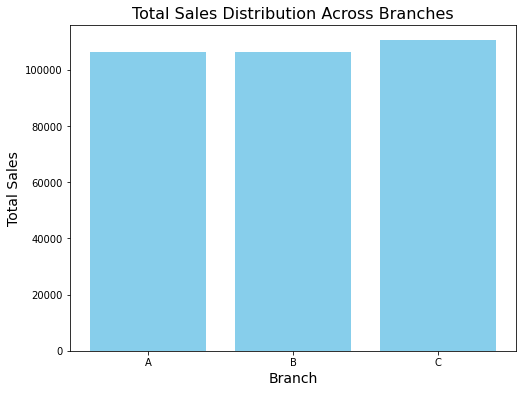

In [6]:
sales_distribution = df.groupby('Branch')['Total'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(sales_distribution['Branch'], sales_distribution['Total'], color='skyblue')

# Add titles and labels
plt.title('Total Sales Distribution Across Branches', fontsize=16)
plt.xlabel('Branch', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Show the plot
plt.show()

# 2-How does the sales revenue vary between different cities where the supermarkets are located?

In [7]:
df.groupby(['City', 'Branch'])['Total'].sum().reset_index()

,City,Branch,Total
0,Mandalay,B,106197.6720
1,Naypyitaw,C,110568.7065
2,Yangon,A,106200.3705


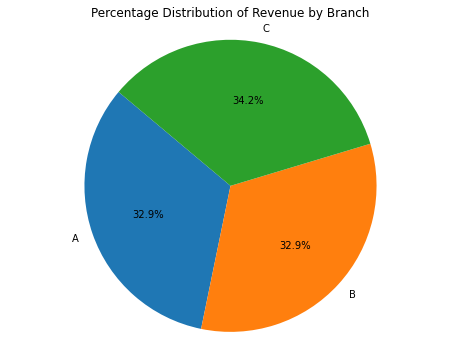

In [8]:
# Grouping by 'Branch' and summing the 'Total'
branch_revenue = df.groupby(['Branch'])['Total'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(branch_revenue['Total'], labels=branch_revenue['Branch'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Revenue by Branch')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3-Are there differences in purchasing behavior between members and non-members?

In [9]:
df['Payment'].value_counts().reset_index()

,Payment,count
0,Ewallet,345
1,Cash,344
2,Credit card,311


In [10]:
df.groupby(['Customer type', 'Payment']).size().reset_index(name='Count')



,Customer type,Payment,Count
0,Member,Cash,168
1,Member,Credit card,172
2,Member,Ewallet,161
3,Normal,Cash,176
4,Normal,Credit card,139
5,Normal,Ewallet,184


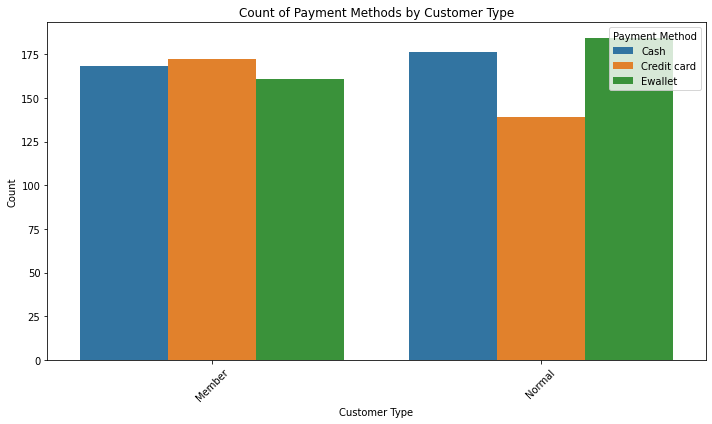

In [11]:
payment_counts = df.groupby(['Customer type', 'Payment']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='Customer type', y='Count', hue='Payment')
plt.title('Count of Payment Methods by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the layout to fit the labels
plt.show()

# 4-Is there a gender-based difference in the types of products purchased?

In [12]:
df.groupby(['Gender', 'Payment']).size().reset_index(name='Count')

,Gender,Payment,Count
0,Female,Cash,178
1,Female,Credit card,163
2,Female,Ewallet,160
3,Male,Cash,166
4,Male,Credit card,148
5,Male,Ewallet,185


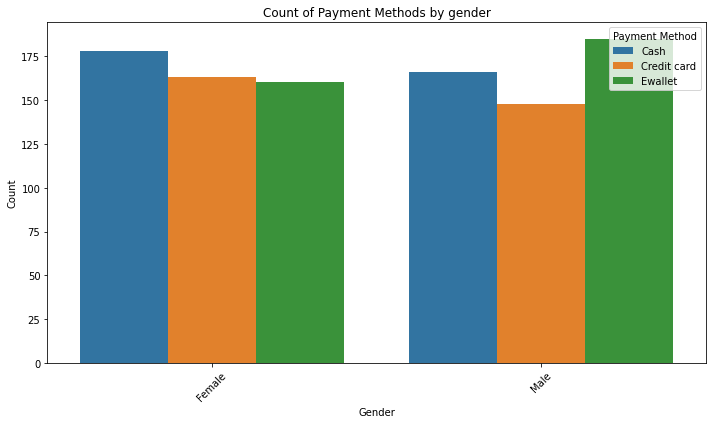

In [13]:
Gender_counts = df.groupby(['Gender', 'Payment']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=Gender_counts, x='Gender', y='Count', hue='Payment')
plt.title('Count of Payment Methods by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the layout to fit the labels
plt.show()

# 5- Which product line generates the highest revenue?

In [14]:
df.groupby('Product line')['Total'].sum().reset_index()

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


In [18]:
df.groupby('Product line')['Total'].sum().idxmax()

'Food and beverages'

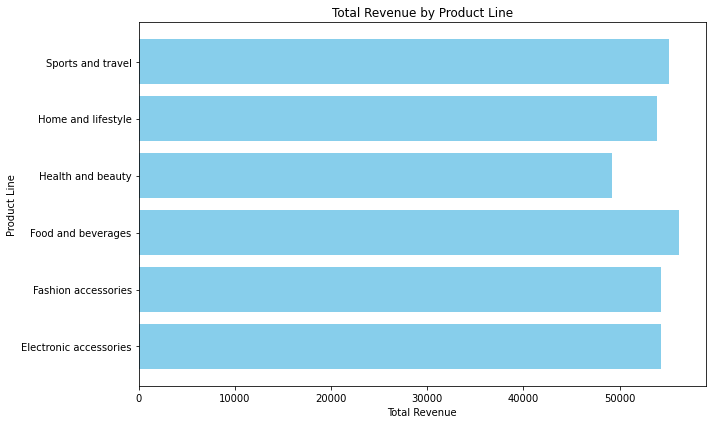

In [19]:
product_line_revenue = df.groupby('Product line')['Total'].sum().reset_index()

# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(product_line_revenue['Product line'], product_line_revenue['Total'], color='skyblue')
plt.title('Total Revenue by Product Line')
plt.xlabel('Total Revenue')
plt.ylabel('Product Line')
plt.tight_layout()  # Adjusts the layout to fit the labels
plt.show()

# 6-What is the most popular time of day for shopping?

In [22]:
# Explicitly specifying the time format to avoid warnings
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Counting the number of transactions per hour
hourly_counts = df['Hour'].value_counts().sort_index()
hourly_counts.idxmax()

19

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_7192\3273732094.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Hour'], shade=True, color="r")


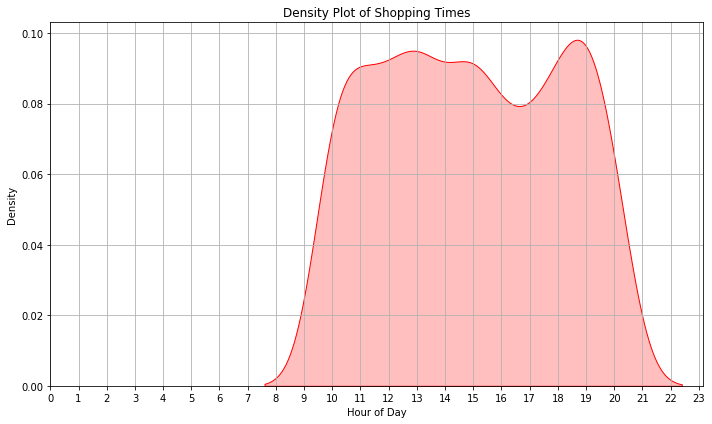

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Hour'], shade=True, color="r")
plt.title('Density Plot of Shopping Times')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# 7-Are there specific months when the sales peak?

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Total'].sum().reset_index()

,Month,Total
0,1,116291.868
1,2,97219.374
2,3,109455.507


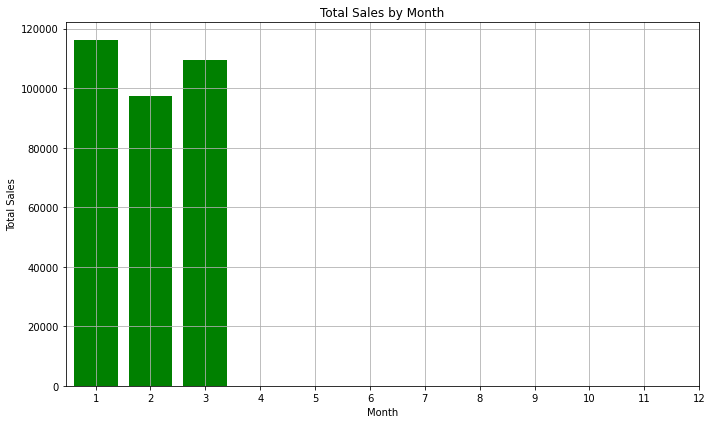

In [38]:
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Total'], color='green')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# 8-What payment method is most commonly used by customers?

In [45]:
df['Payment'].value_counts().idxmax()

'Ewallet'

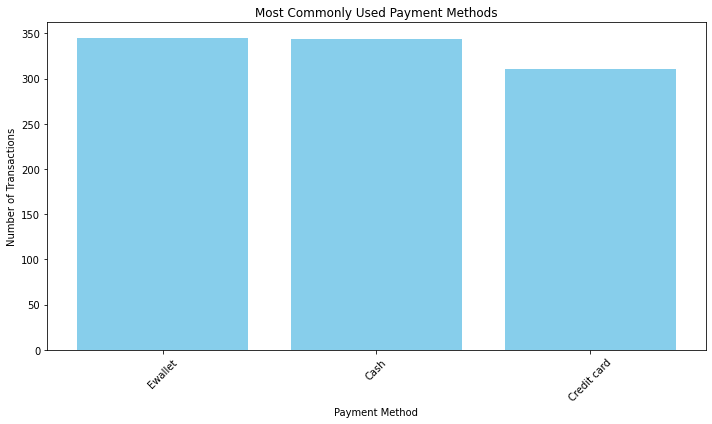

In [46]:
payment_counts = df['Payment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(payment_counts.index, payment_counts.values, color='skyblue')
plt.title('Most Commonly Used Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9-Is there a correlation between unit price and quantity purchased?

In [47]:
df['Unit price'].corr(df['Quantity'])

0.01077756434249728

# 10-How does the cost of goods sold (COGS) vary between product lines?

In [50]:
df.groupby('Product line')['cogs'].sum().reset_index()

,Product line,cogs
0,Electronic accessories,51750.03
1,Fashion accessories,51719.90
2,Food and beverages,53471.28
3,Health and beauty,46851.18
4,Home and lifestyle,51297.06
5,Sports and travel,52497.93


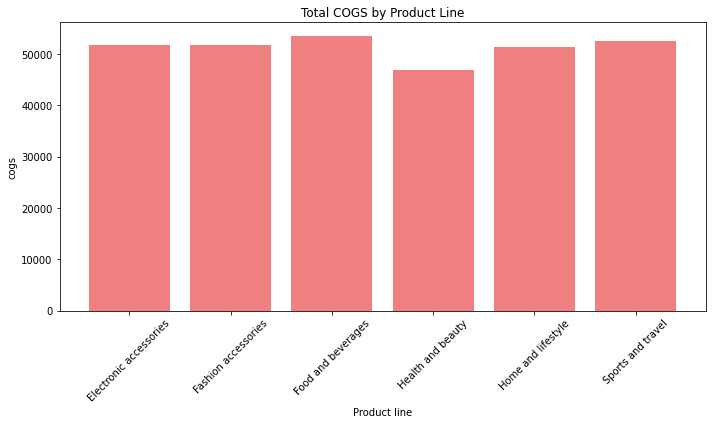

In [55]:
cogs_by_product_line=df.groupby('Product line')['cogs'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(cogs_by_product_line['Product line'], cogs_by_product_line['cogs'], color='lightcoral')
plt.title('Total COGS by Product Line')
plt.xlabel('Product line')
plt.ylabel('cogs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11-What is the gross margin percentage for each branch?

In [68]:
branch_gross_margin= df.groupby('Branch')['gross margin percentage'].mean().reset_index()
print (branch_gross_margin)

  Branch  gross margin percentage
0      A                 4.761905
1      B                 4.761905
2      C                 4.761905


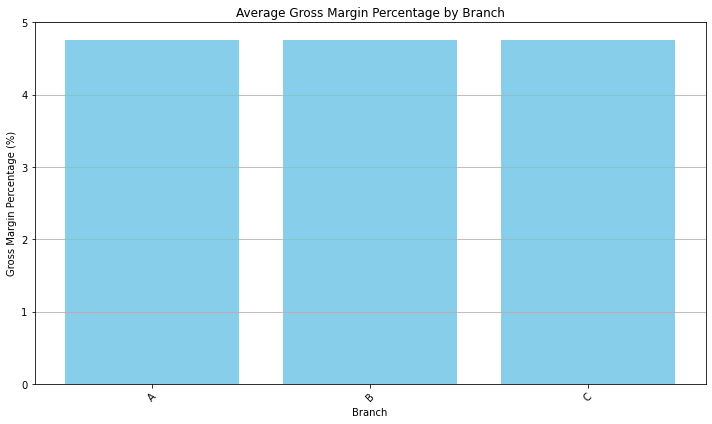

In [67]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(branch_gross_margin['Branch'], branch_gross_margin['gross margin percentage'], color='skyblue')
plt.xlabel('Branch')
plt.ylabel('Gross Margin Percentage (%)')
plt.title('Average Gross Margin Percentage by Branch')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# 12-Is there a relationship between the gross income and the rating given by customers?

In [69]:
df['gross income'].corr(df['Rating'])

-0.03644170499701838

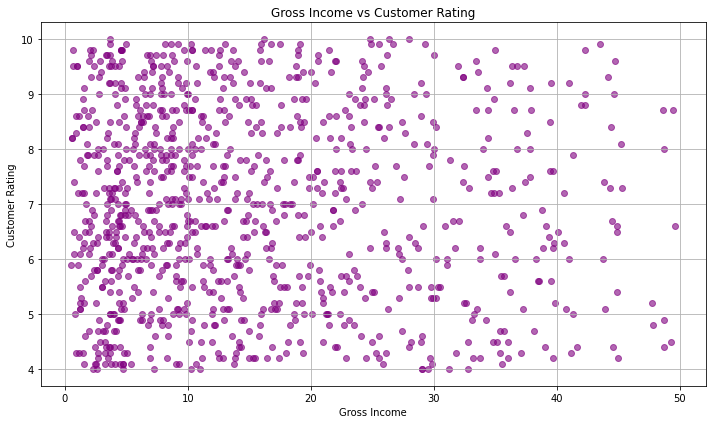

# 13-How does the average rating vary for different product lines?

In [73]:
product_line_rating = df.groupby('Product line')['Rating'].mean().reset_index()
product_line_rating['Rating'] = product_line_rating['Rating'].round(2)
product_line_rating

,Product line,Rating
0,Electronic accessories,6.92
1,Fashion accessories,7.03
2,Food and beverages,7.11
3,Health and beauty,7.00
4,Home and lifestyle,6.84
5,Sports and travel,6.92


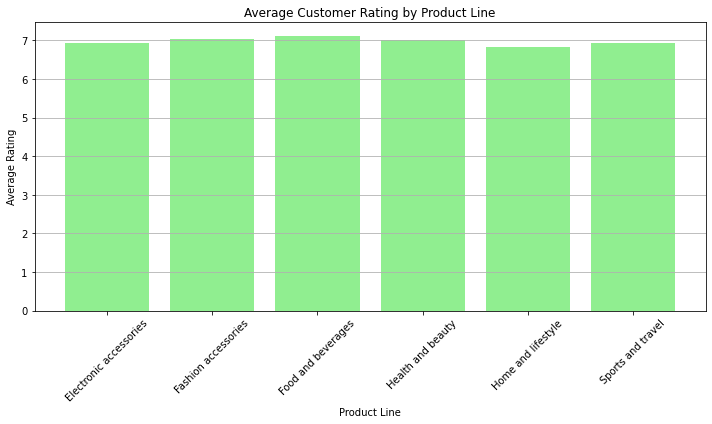

In [75]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(product_line_rating['Product line'], product_line_rating['Rating'], color='lightgreen')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.title('Average Customer Rating by Product Line')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# 14-What is the distribution of ratings across different branches? 

In [77]:
df.groupby('Branch')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
A,340.0,7.027059,1.731345,4.0,5.6,7.1,8.5,10.0
B,332.0,6.818072,1.713719,4.0,5.3,6.7,8.2,10.0
C,328.0,7.072866,1.704526,4.0,5.6,7.1,8.5,10.0


# 15-Is there a relationship between the total purchase amount and the customer rating?

In [78]:
df['Total'].corr(df['Rating'])

-0.03644170499701834

# 16-How do the sales quantities vary between different product lines?

In [79]:
product_line_sales = df.groupby('Product line')['Quantity'].sum().reset_index()
product_line_sales

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


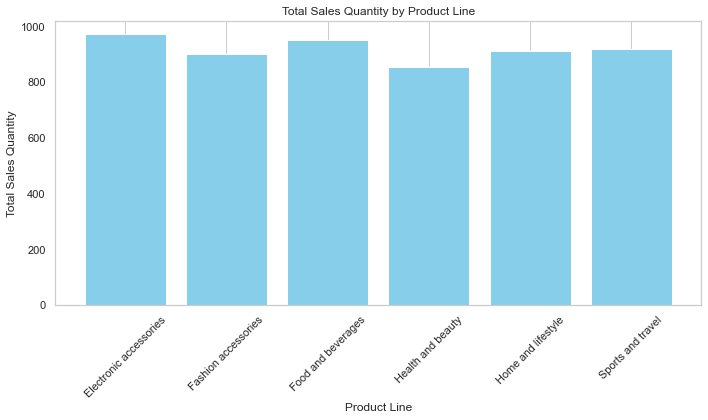

In [80]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(product_line_sales['Product line'], product_line_sales['Quantity'], color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Total Sales Quantity')
plt.title('Total Sales Quantity by Product Line')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# 17-What is the average total purchase amount per city?

In [83]:
average_purchase_per_city=df.groupby('City')['Total'].mean().reset_index().round(2)
average_purchase_per_city

,City,Total
0,Mandalay,319.87
1,Naypyitaw,337.10
2,Yangon,312.35


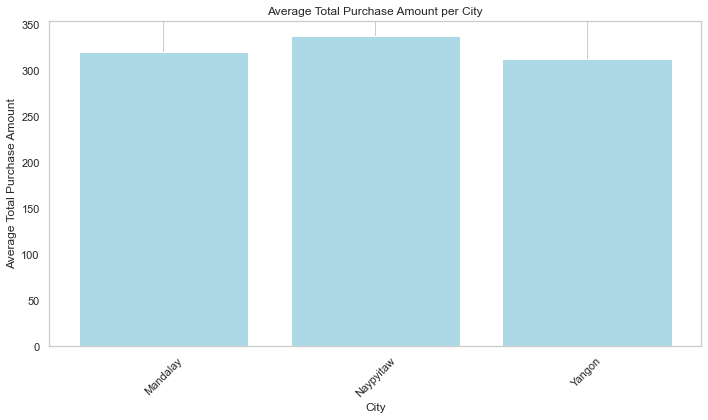

In [85]:
plt.figure(figsize=(10, 6))
plt.bar(average_purchase_per_city['City'], average_purchase_per_city['Total'], color='lightblue')
plt.xlabel('City')
plt.ylabel('Average Total Purchase Amount')
plt.title('Average Total Purchase Amount per City')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# 18-Are there specific days of the week that have higher sales?

In [94]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week (0=Monday, 6=Sunday) and create a new column
sales_by_day =df['Day of Week'] = df['Date'].dt.day_name()
df.groupby('Day of Week')['Total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


Day of Week
Monday       37899.0780
Tuesday      51482.2455
Wednesday    43731.1350
Thursday     45349.2480
Friday       43926.3405
Saturday     56120.8095
Sunday       44457.8925
Name: Total, dtype: float64

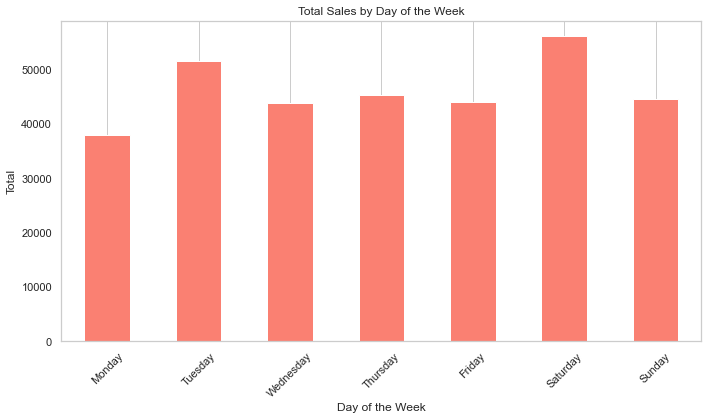

In [98]:
sales_by_day = df.groupby('Day of Week')['Total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Create a bar chart to visualize total sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='salmon')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# 19-How does the tax amount affect the total purchase price for different product lines?

In [99]:
df['Tax 5%'].corr(df['Total'])

1.0

# 20-Can you identify any trends in the data that suggest purchasing patterns or seasonality?